# QB Pass Locations 2020

In [1]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ArrowheadAnalytics/next-gen-scrapy-2.0/master/all_pass_locations.csv')

## Data Preparation

Inspect the dataframe. Lets rename the x and y columns to avoid confusion with the plot axes. We will also filter our dataframe 
to only include 2020 data.

In [3]:
df.head()

,team,week,name,pass_type,x,y,season
0,ARI,1,Kyler Murray,COMPLETE,-21.227102,0.031909,2020
1,ARI,1,Kyler Murray,COMPLETE,13.811042,6.654193,2020
2,ARI,1,Kyler Murray,COMPLETE,-11.848734,4.253002,2020
3,ARI,1,Kyler Murray,COMPLETE,5.388568,-0.568744,2020
4,ARI,1,Kyler Murray,COMPLETE,-23.583576,15.900376,2020


In [4]:
df.rename(columns = {'x':'x_coord', 'y':'y_coord'}, inplace = True)

In [5]:
df['season'].unique()

array([2020, 2017, 2018, 2019], dtype=int64)

In [6]:
df_2020 = df.loc[df['season'] == 2020]

NumExpr defaulting to 8 threads.


## Data Understanding 

Visualize Aaron Rodgers' completed passes. The pass_type column is key to our visualization but to start we will
only plot completions.

In [7]:
rodgers = df_2020.loc[df_2020['name'] == 'Aaron Rodgers']

rodgers.head()

,team,week,name,pass_type,x_coord,y_coord,season
5863,GB,1,Aaron Rodgers,COMPLETE,21.524350,5.909300,2020
5864,GB,1,Aaron Rodgers,COMPLETE,-17.583114,0.943503,2020
5865,GB,1,Aaron Rodgers,COMPLETE,-1.364166,13.906192,2020
5866,GB,1,Aaron Rodgers,COMPLETE,11.587497,-1.196374,2020
5867,GB,1,Aaron Rodgers,COMPLETE,25.988518,37.601230,2020


In [8]:
rodgers['pass_type'].unique()

array(['COMPLETE', 'TOUCHDOWN', 'INCOMPLETE', 'INTERCEPTION'],
      dtype=object)

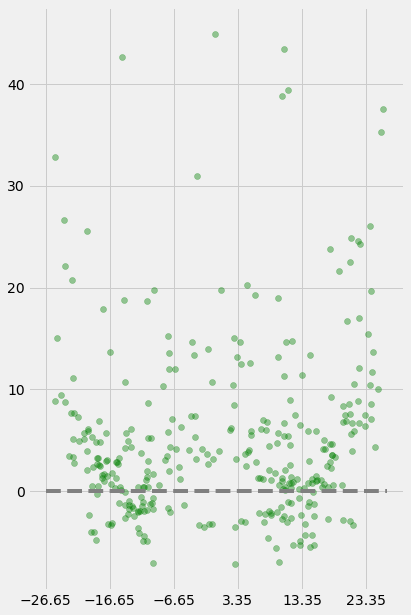

In [9]:
complete = rodgers.loc[rodgers['pass_type'] == 'COMPLETE']

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize = (6,10))

ax.scatter(x = complete['x_coord'], y = complete['y_coord'], color = 'green', alpha = 0.4)

ax.set_yticks(np.arange(-20, 60, 10))
ax.set_xticks(np.arange(-53.3/2, 53.3/2, 10))

ax.hlines(0, -53.3/2, 53.3/2, color = 'grey', linestyles='dashed')

## Plotting Function

Now we can write a function which visualizes completions, incompletions, touchdowns, and interceptions and test it on several QBs.

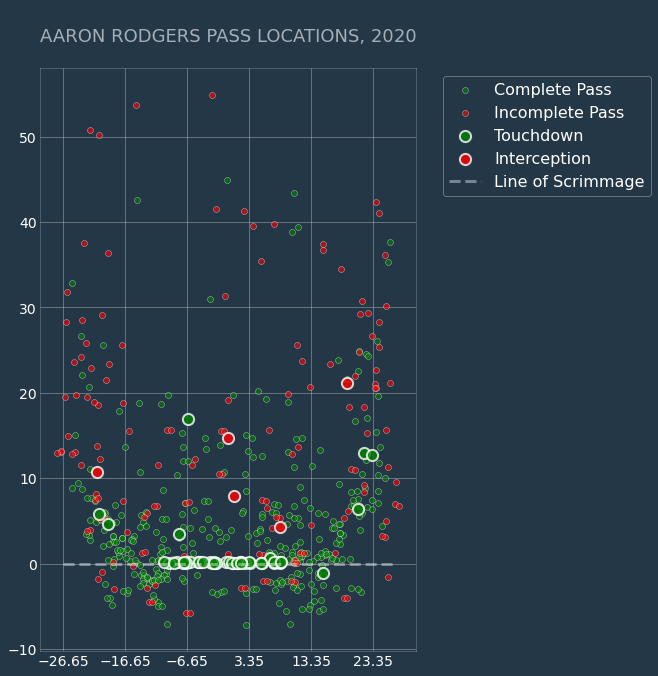

In [10]:
def plot_passes(player_name = 'Aaron Rodgers', year = 2020):
    
    plt.style.use('fivethirtyeight')
    
    player = df.loc[(df['season'] == year) & (df['name'] == player_name)]
    
    complete = player.loc[player['pass_type'] == 'COMPLETE']
    incomplete = player.loc[player['pass_type'] == 'INCOMPLETE']
    interception = player.loc[player['pass_type'] == 'INTERCEPTION']
    touchdown = player.loc[player['pass_type'] == 'TOUCHDOWN']
    
    fig, ax = plt.subplots(figsize = (6,10))
    
    ax.scatter(complete['x_coord'], complete['y_coord'], color = 'green', alpha = 0.6, edgecolors = 'white')
    ax.scatter(incomplete['x_coord'], incomplete['y_coord'], color = 'red', alpha = 0.6, edgecolors = 'white')
    ax.scatter(touchdown['x_coord'], touchdown['y_coord'], color = 'green', alpha = 0.8, edgecolors = 'white', linewidth = 2, s=125)
    ax.scatter(interception['x_coord'], interception['y_coord'], color = 'red', alpha = 0.8, edgecolors = 'white', linewidth = 2, s=125)
    
    ax.set_yticks(np.arange(-20, 60, 10))
    ax.set_xticks(np.arange(-53.3/2, 53.3/2, 10))
    
    ax.tick_params(axis='x', colors = 'white', grid_alpha = 0.4)
    ax.tick_params(axis='y', colors = 'white', grid_alpha = 0.4)
    plt.setp(ax.spines.values(), color = 'white', alpha = 0.2, linewidth = 1)
    
    ax.hlines(0, -53.3/2, 53.3/2, color = 'white', linewidth = 3, linestyles='dashed',  alpha = 0.4)
    
    ax.set_title('\n' + player_name.upper() + ' pass locations, '.upper() + str(year) + '\n', color = '#ffffff',
                 alpha = 0.6, fontsize = 18)
    
    ax.set_facecolor('#233746')
    fig.set_facecolor('#233747')
    
    ax.legend(['Complete Pass', 'Incomplete Pass', 'Touchdown', 'Interception', 'Line of Scrimmage'],
             ncol = 1, loc = 'upper left', bbox_to_anchor = (1.05,1), facecolor = '#233746', labelcolor = '#ffffff',
              prop = {'size':16})
    
    
plot_passes()    
    
    
    
    

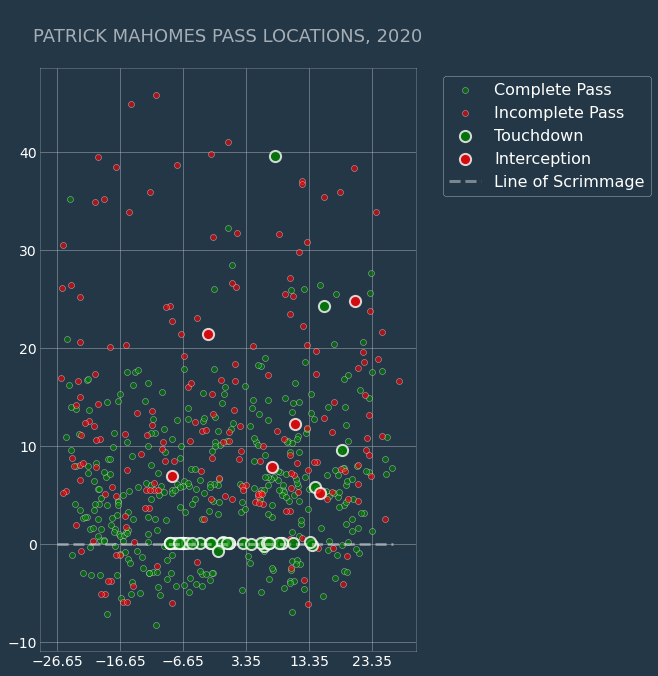

In [11]:
plot_passes(player_name = 'Patrick Mahomes')

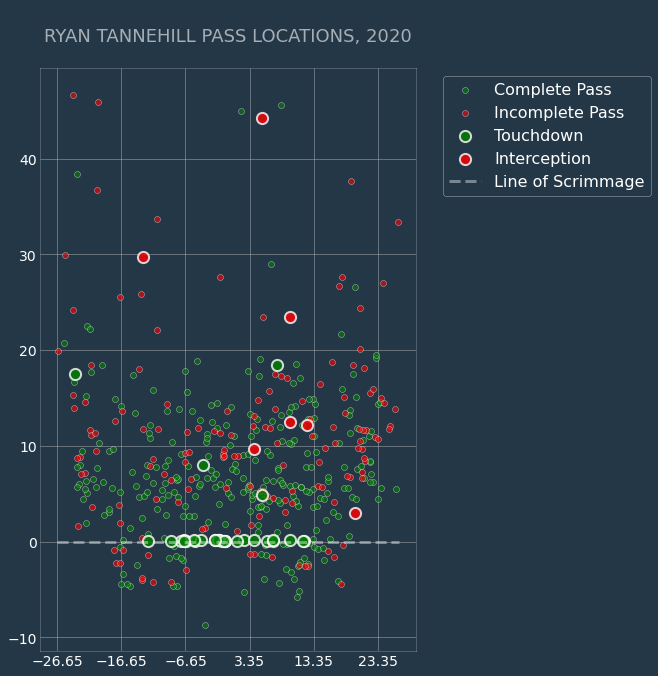

In [12]:
plot_passes(player_name = 'Ryan Tannehill')